#EXERCISE 10.1

###Parallelization of the TSP-GA code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import geopandas as gpd
from matplotlib.cm import ScalarMappable
warnings.filterwarnings('ignore')

I created a population of 300 casual permutations of the loaded list for each node, and I chose a migration time $N_{step}$ of 50. My reasoning for this choice is that a fast migration time would imply getting closer to having one process with a population equal to $300*N_{nodes}$, while a slower one, while useful to break stagnation, would compare to the timescales of the fluctuations imposed by mutation. Therefore, there should be a sweet spot with $N_{step}$ large enough to let each single process explore the boundaries of its optimal solution, while keeping the usefulness of migration in breaking the "genome" stagnation often enough.

The number of individuals sent by each node is 7*$N_{nodes}$, so that, on average, a node receives 7 individuals by each other one. (7 was chosen so that, using 8 nodes $7*8 ≃ 50 = 25$% $N_{pop}$.

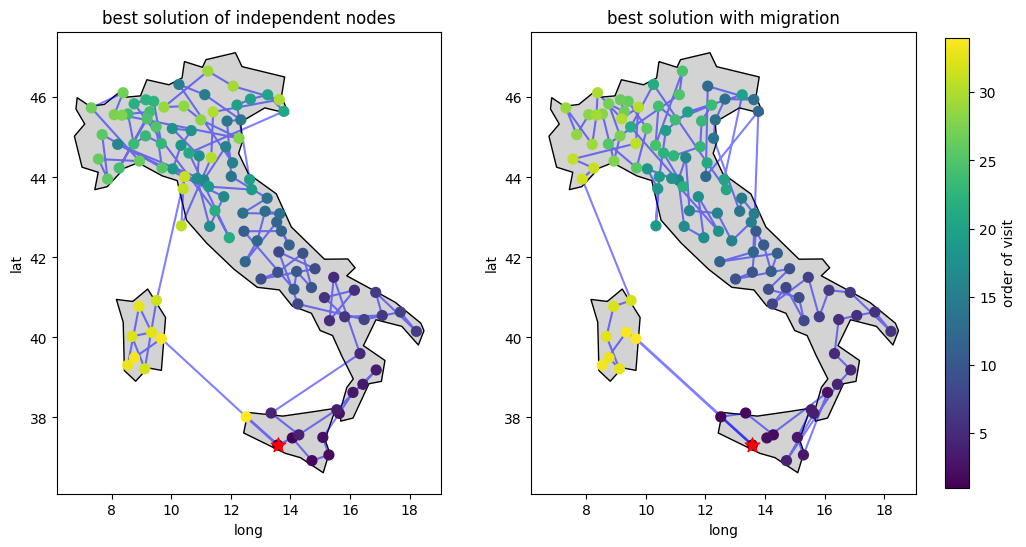

In [2]:
world = gpd.read_file('country_shapes/ne_110m_admin_0_countries.shp')
italy = world[world['NAME'] == 'Italy']

colors = np.linspace(0, 1, 110)

Square_init_path = pd.read_csv('TSP_result_NO_MIGR.dat', delim_whitespace=True, header=None)
Square_best_path = pd.read_csv('TSP_result_MIGR.dat', delim_whitespace=True, header=None)
Square_init_path.columns = ['ID', 'X', 'Y']
Square_best_path.columns = ['ID', 'X', 'Y']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(Square_init_path['X'], Square_init_path['Y'], c=colors, cmap='viridis', s=50)
ax[0].plot(Square_init_path['X'], Square_init_path['Y'], c='blue', zorder=0.1, alpha=0.5)
ax[0].plot([Square_init_path['X'].iloc[0], Square_init_path['X'].iloc[-1]], [Square_init_path['Y'].iloc[0], Square_init_path['Y'].iloc[-1]], color='blue', zorder=0.1, alpha=0.5, linewidth=2)
ax[0].scatter(Square_init_path['X'].iloc[0], Square_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[0].set(xlabel = 'long', ylabel = 'lat', title = 'best solution of independent nodes')
italy.plot(ax=ax[0], color='lightgray', edgecolor='black', zorder = 0)

ax[1].scatter(Square_best_path['X'], Square_best_path['Y'], c=colors, cmap='viridis', s=50)
ax[1].plot(Square_best_path['X'], Square_best_path['Y'], c='blue', zorder=0.1, alpha=0.5)
ax[1].plot([Square_best_path['X'].iloc[0], Square_best_path['X'].iloc[-1]], [Square_best_path['Y'].iloc[0], Square_best_path['Y'].iloc[-1]], color='blue', zorder=0.1, alpha=0.5, linewidth=2)
ax[1].scatter(Square_init_path['X'].iloc[0], Square_init_path['Y'].iloc[0], s=120, color = 'red', marker='*')
ax[1].set(xlabel = 'long', ylabel = 'lat', title = 'best solution with migration')
italy.plot(ax=ax[1], color='lightgray', edgecolor='black', zorder = 0)

plt.subplots_adjust(right=0.85)

norm = plt.Normalize(vmin=1, vmax=34)
sm = ScalarMappable(cmap=plt.cm.viridis, norm=norm)
cbar_ax = fig.add_axes([0.87, 0.12, 0.02, 0.75])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("order of visit")

plt.show()
plt.close()


It can already be seen by a visual inspection that the optimal path performed with migration seems better than the other (more orderly, cities visited more or less counter-clockwise in the northern regions, which implies less jumping around the map, and with less long tracts). This becomes evident, if not by much, by looking at the distance travelled:

In [8]:
results = pd.read_csv('notable_results.dat', delim_whitespace=True)

results_migr = results[results['MODE']=='MIGR']
results_no_migr = results[results['MODE']=='NO_MIGR']

print("Best path length solved with genetic algorithm with migration between ", results['NODE'].max() + 1, " continents: ", results_migr['COST'].min())
print("Best path length solved with independent genetic algorithm between ", results['NODE'].max() + 1, " continents: ", results_no_migr['COST'].min())

print("averages: ")
print("with migration: ", results_migr['COST'].mean(), "+-" , results_migr['COST'].std())
print("without migration: ", results_no_migr['COST'].mean(), "+-" , results_no_migr['COST'].std())

Best path length solved with genetic algorithm with migration between  8  continents:  119.664
Best path length solved with independent genetic algorithm between  8  continents:  134.621
averages: 
with migration:  123.1335 +- 1.6138491697978274
without migration:  142.12975 +- 5.542591780282681


The solution obtained with migration is 10% shorter than without! This result is also consistent among different continents.

Results obtained without migration have a greater dispersion between the distances found. This is because after reaching local minima, in absence of migration the population tends to stagnate more around them, while adding migration exploring random mixes of optimal solutions grants a more explorative approach of the solution space.

In [3]:
results

,NODE,MODE,COST
0,0,MIGR,122.635
1,1,MIGR,123.916
2,2,MIGR,123.995
3,3,MIGR,124.329
4,4,MIGR,119.664
5,5,MIGR,123.127
6,6,MIGR,124.823
7,7,MIGR,122.579
8,0,NO_MIGR,134.621
9,1,NO_MIGR,148.324
